## Compare impact of launch level

Impact of launch levels compared. Simulations run using GCM data using $F_{S0} = 4.3\text{mPa}, c_w = 35 \text{m/s}$.


In [1]:
import xarray as xr 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
launch_levels = [
    1000,
    3000,
    5000,
    7000,
    9000, # This is the default
    11000,
]
DATADIR = 'data'
ds = xr.open_mfdataset([f'{DATADIR}/mima_gwf_ll{level}_always_include_unbroken_1year.nc' for level in launch_levels],combine='nested',concat_dim='launch_level',chunks={'time':180})
ds = ds.assign_coords(launch_level=launch_levels)
ds

<xarray.Dataset> Size: 105GB
Dimensions:            (launch_level: 6, time: 1440, longitude: 128,
                        latitude: 64, level: 37)
Coordinates:
  * longitude          (longitude) float32 512B 0.0 2.812 5.625 ... 354.4 357.2
  * latitude           (latitude) float32 256B -87.86 -85.1 ... 85.1 87.86
  * level              (level) float32 148B 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * time               (time) object 12kB 0025-01-01 00:00:00 ... 0025-12-30 ...
  * launch_level       (launch_level) int64 48B 1000 3000 5000 7000 9000 11000
Data variables:
    u                  (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    temp               (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    v                  (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    z                  (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    Ns                 (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    rho                (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    gw_flux_westward   (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    gw_flux_eastward   (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    gw_flux_southward  (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
    gw_flux_northward  (launch_level, time, longitude, latitude, level) float32 10GB dask.array<chunksize=(1, 180, 128, 64, 37), meta=np.ndarray>
Attributes:
    filename:                   atmos_4xdaily_interp.nc
    title:                      MiMA
    history:                    Tue Jul 08 18:56:01 2025: plevel.sh -a -i atm...
    NCO:                        netCDF Operators version 5.2.4 (Homepage = ht...
    fre-nctools:                FRE NCTools version 2024.05 (git: 2024.05.01-...
    ad99_intrinsic_c_settings:  always
    ad99_Bt:                    0.0043
    ad99_cw:                    35
    ad99_Bm:                    0.4
    ad99_exclude_unbroken:      0
    ad99_launch_level:          1000
    ad99_source:                gaussian

In [2]:
balloon_fluxes = ds.sel(level=50)
balloon_fluxes

<xarray.Dataset> Size: 3GB
Dimensions:            (launch_level: 6, time: 1440, longitude: 128,
                        latitude: 64)
Coordinates:
  * longitude          (longitude) float32 512B 0.0 2.812 5.625 ... 354.4 357.2
  * latitude           (latitude) float32 256B -87.86 -85.1 ... 85.1 87.86
    level              float32 4B 50.0
  * time               (time) object 12kB 0025-01-01 00:00:00 ... 0025-12-30 ...
  * launch_level       (launch_level) int64 48B 1000 3000 5000 7000 9000 11000
Data variables:
    u                  (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    temp               (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    v                  (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    z                  (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    Ns                 (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    rho                (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    gw_flux_westward   (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    gw_flux_eastward   (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    gw_flux_southward  (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
    gw_flux_northward  (launch_level, time, longitude, latitude) float32 283MB dask.array<chunksize=(1, 180, 128, 64), meta=np.ndarray>
Attributes:
    filename:                   atmos_4xdaily_interp.nc
    title:                      MiMA
    history:                    Tue Jul 08 18:56:01 2025: plevel.sh -a -i atm...
    NCO:                        netCDF Operators version 5.2.4 (Homepage = ht...
    fre-nctools:                FRE NCTools version 2024.05 (git: 2024.05.01-...
    ad99_intrinsic_c_settings:  always
    ad99_Bt:                    0.0043
    ad99_cw:                    35
    ad99_Bm:                    0.4
    ad99_exclude_unbroken:      0
    ad99_launch_level:          1000
    ad99_source:                gaussian

In [3]:
from ad99py.loon import loon_data
LOON_DATA = loon_data(path='data/loon')
LOON_DATA.keys()

dict_keys(['u_flux_ntv', 'u_flux_ptv', 'v_flux_ntv', 'v_flux_ptv', 'u_flux_abs', 'v_flux_abs', 'u_flux_net', 'v_flux_net', 'net_flux', 'abs_flux'])

In [4]:
from ad99py.masks import list_basins
list_basins(dir=DATADIR)


['tropical_atlantic',
 'extratropical_atlantic',
 'extratropical_pacific',
 'indian',
 'tropical_pacific',
 'southern_ocean']

In [5]:
from ad99py.masks import mask_dataset
BASINS = None # All basins
basin_title = ""
 
masked_ds = mask_dataset(balloon_fluxes)


In [6]:

def filter_scale(fluxes):
    fluxes = np.abs(fluxes)
    fluxes = fluxes[fluxes > 1e-8] # zeros mess with the PDF so lets remove these
    return fluxes*1000




### Eastward fluxes

In [7]:
LOON_DATA

{'u_flux_ntv': array([-0.72209693, -0.80537298, -0.89780188, ..., -0.73362199,
        -0.75338861, -0.77380222], shape=(2008377,)),
 'u_flux_ptv': array([0.66282929, 0.68694921, 0.70463496, ..., 0.16577572, 0.21054488,
        0.25211481], shape=(2007075,)),
 'v_flux_ntv': array([-0.75237511, -0.74579983, -0.74305203, ..., -0.33313583,
        -0.34103358, -0.34870794], shape=(2007606,)),
 'v_flux_ptv': array([1.63941554, 1.65004715, 1.68584585, ..., 0.68603535, 0.71914522,
        0.74822628], shape=(2008290,)),
 'u_flux_abs': array([1.38492622, 1.49232219, 1.60243684, ..., 0.89939771, 0.96393349,
        1.02591703], shape=(2009770,)),
 'v_flux_abs': array([2.39179064, 2.39584697, 2.42889788, ..., 1.01917118, 1.06017879,
        1.09693422], shape=(2009770,)),
 'u_flux_net': array([-0.05926765, -0.11842376, -0.19316692, ..., -0.56784627,
        -0.54284373, -0.52168742], shape=(2009770,)),
 'v_flux_net': array([0.88704043, 0.90424732, 0.94279381, ..., 0.35289952, 0.37811164,
      

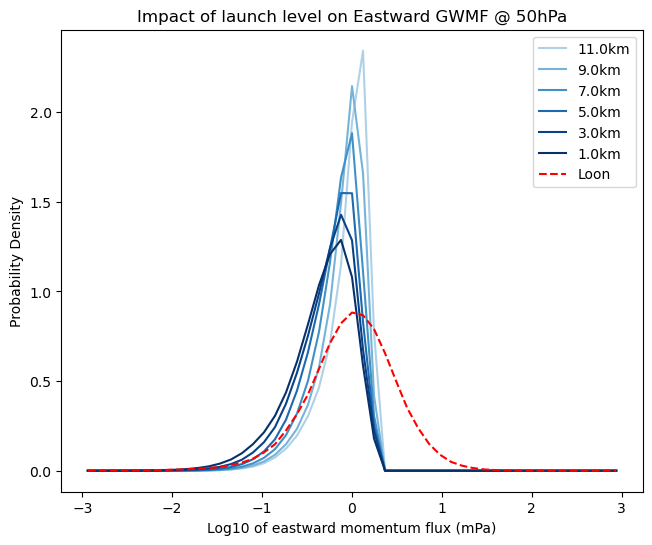

In [8]:
fig,ax = plt.subplots(1,1,figsize=(7.5,6))
log_bin_edge= np.linspace(-3,3,endpoint=True)
log_bin_center = 0.5*(log_bin_edge[1:] + log_bin_edge[:-1])

cmap_base = plt.cm.Blues_r
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "blues_cut", cmap_base(np.linspace(0, 0.75, 256))
)
norm = mpl.colors.BoundaryNorm(np.arange(0.5,6.5,0.5), cmap.N)
for i in range(6)[::-1]:
    launch_level = balloon_fluxes.launch_level.isel(launch_level=i).values
    eastward_fluxes = filter_scale(balloon_fluxes.gw_flux_eastward.isel(launch_level=i).data.compute())
    eastward_fluxes_log = np.log10(eastward_fluxes)

    flux_bin, flux_edge = np.histogram(eastward_fluxes_log,bins=log_bin_edge,density=True)

    ax.plot(log_bin_center,flux_bin,label=f'{launch_level/1000}km',c=cmap(norm(i)))
ax.set_xlabel("Log10 of eastward momentum flux (mPa)")
loon_flux_bin, _ = np.histogram(np.log10(LOON_DATA['u_flux_ptv']),bins=log_bin_edge,density=True)
ax.plot(log_bin_center,loon_flux_bin,color='red',linestyle='--',label="Loon")
ax.set_title("Impact of launch level on Eastward GWMF @ 50hPa")
ax.set_ylabel("Probability Density")
plt.legend()
plt.savefig('figures/always_include_unbroken_1year_launch_level_gcm.png',dpi=300)

In [30]:
list(range(5,-1,-1))

[5, 4, 3, 2, 1, 0]

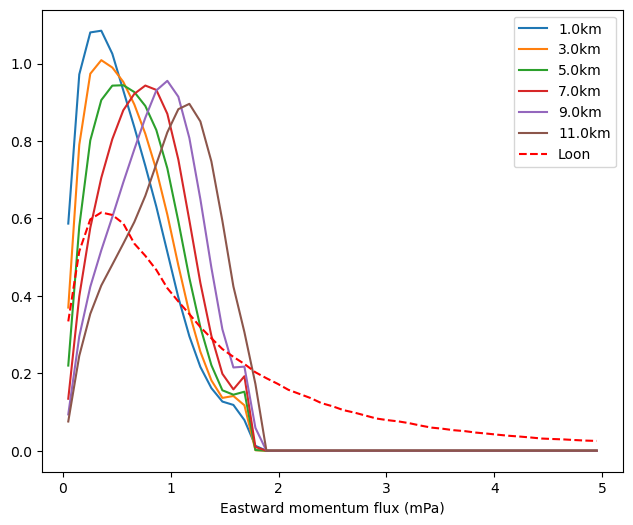

In [34]:
fig,ax = plt.subplots(1,1,figsize=(7.5,6))
bin_edge= np.linspace(0,5,endpoint=True)
bin_center = 0.5*(bin_edge[1:] + bin_edge[:-1])
for i in range(6):
    launch_level = balloon_fluxes.launch_level.isel(launch_level=i).values
    eastward_fluxes = filter_scale(balloon_fluxes.gw_flux_eastward.isel(launch_level=i).data.compute())
    # eastward_fluxes_log = np.log10(eastward_fluxes)

    flux_bin, flux_edge = np.histogram(eastward_fluxes,bins=bin_edge,density=True)

    ax.plot(bin_center,flux_bin,label=f'{launch_level/1000}km')
ax.set_xlabel("Eastward momentum flux (mPa)")
flux_bin, _ = np.histogram(LOON_DATA['u_flux_ptv'],bins=bin_edge,density=True)
ax.plot(bin_center,flux_bin,color='red',linestyle='--',label="Loon")
plt.legend()